In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
def read_csv(path, initial_Mn):
    data_dict = {}
    files = os.listdir(path)

    for file in files:
        if 'sweep' in file:
            new_df = pd.DataFrame()
            with open(os.path.join(path, file)) as f:
                name = file.split('_')[1]
                df = pd.read_csv(f, sep = ';', decimal = ',')
                new_df['total Cl conc'] = df['total Cl conc']
                new_df['pH'] = df['pH']
                for key in df.keys()[4:]:
                    percent_species = (df[key] / df['total Mn conc']) * 100
                    new_df[key] = percent_species
                data_dict[name] = new_df
    
        if 'deg' in file:
            new_df = pd.DataFrame()
            with open(os.path.join(path, file)) as f:
                name = file.split('_')[3]
                name = name.split('.')[0]
                df = pd.read_csv(f, sep = ';', decimal = ',')
                new_df['pH'] = df['pH']
                for key in df.keys()[1:]:
                    percent_species = (df[key] / initial_Mn) * 100
                    new_df[key] = percent_species
                data_dict[name] = new_df
        
    return data_dict

In [3]:
path = '.'
initial_Mn = 1.23*10**(-8)

data = read_csv(path, initial_Mn)
print(data['sweep37'].keys()[2:])

species_sw = [r'Mn$^{2+}$', r'Mn$_{2}$(OH)$_{3}^{+}$', r'Mn$_{2}$OH$^{3+}$', r'MnBr$^{+}$', r'MnCl$^{+}$', r'MnCl$_{2}$ (aq)', r'MnCl$_{3}^{-}$', r'MnCO$_{3}$ (aq)',
           r'MnF$^{+}$', r'MnHCO$_{3}^{+}$', r'MnOH$^{+}$', r'MnSO$_{4}$ (aq)']
colors_sw = ['orange', 'darksalmon', 'orangered', 'mediumorchid', 'royalblue', 'mediumblue', 'navy', 'darkcyan', 'darkmagenta', 'tab:cyan', 'tab:red', 'tab:green']
markers_sw = ['o', 'v', '<', 's', 'p', 'P', '*', 'H', 'X', 'D', '^', 'd']

species_brine = [r'Mn$^{2+}$', r'MnCO$_{3}$ (aq)', r'MnCl$^{+}$', r'MnCl$_{2}$ (aq)', r'MnCl$_{3}^{-}$', r'MnSO$_{4}$ (aq)']
colors_brine = ['orange', 'darkcyan', 'royalblue', 'mediumblue', 'navy', 'tab:green']

Index(['Mn+2', 'MnBr+', 'MnCO3 (aq)', 'MnCl+', 'MnCl2 (aq)', 'MnCl3-', 'MnF+',
       'MnHCO3+', 'MnOH+', 'MnSO4 (aq)'],
      dtype='object')


In [4]:
def plot_sw(ax, df, labels, colors, markers, ncols, bb2a):
    for i, key in enumerate(df.keys()[1:]):
        ax.scatter(df['pH'], df[key], s = 10, zorder =10, color = colors[i], marker = markers[i])   #  label = labels[i], 
        ax.plot(df['pH'], df[key], lw = 1, color = colors[i], label = labels[i])
    
    ax.set_ylabel('% species', fontsize = 8)
    ax.set_xlabel('pH', fontsize = 8)
    
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.set_yscale('log')
    ax.set_ylim(10**(-2), 10**(2))
    ax.yaxis.offsetText.set_fontsize(8)

    ax.legend(frameon = False, ncol=ncols, loc = 4, bbox_to_anchor = bb2a, fontsize = 8)

In [5]:
def plot_brine(ax, df, colors):
    df = df.drop(['MnBr+', 'MnF+', 'MnHCO3+', 'MnOH+'], axis = 1)
    below = df['total Cl conc'] < 1.236375
    above = df['total Cl conc'] >= 1.099000
    for i, key in enumerate(df.keys()[2:]):
        ax.plot(df['total Cl conc'][below], df[key][below], lw = 1, color = colors[i], ls = '-')    # , label = labels[i]
        ax.plot(df['total Cl conc'][above], df[key][above], lw = 1, color = colors[i], ls = '--')
    
    ax.set_ylabel('% species', fontsize = 8)
    ax.set_xlabel('Cl$^{-}$ concentration / M', fontsize = 8)
    
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    # ax.set_yscale('log')
    # ax.set_ylim(10**(-2), 10**(2))
    ax.yaxis.offsetText.set_fontsize(8)

    # ax.legend(frameon = False, ncol=ncols, loc = 4, bbox_to_anchor = bb2a, fontsize = 8)

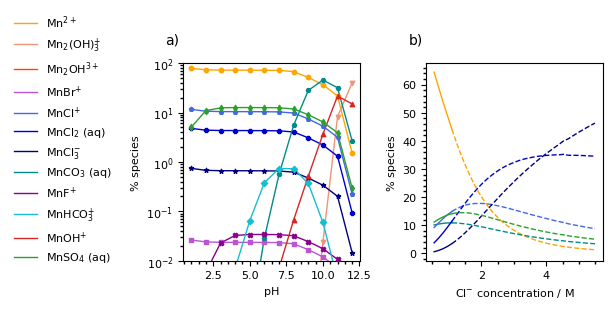

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (6.4, 3))

plot_sw(ax[0], data['25deg'], species_sw, colors_sw, markers_sw, 1, (-0.35, -0.07))
plot_brine(ax[1], data['sweep37'], colors_brine)

sublabels = ['a)', 'b)']
for ax, l in zip(ax.flatten(), sublabels):
    ax.text(-0.1, 1.1, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('acm.jpg', dpi = 600)
plt.show()